In [4]:
## Importables
from platform import python_version
print(f"Python version {python_version()}")

import sys
import os

#sys.path.append("/windir/c/Users/redas/Desktop/jupyter_directory/helpers/src/helpers/")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, NMF
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, normalize
from math import log10, log2, ceil, floor, sqrt

# And grab the helpers
import sys
sys.path.append("/windir/c/Users/redas/Desktop/jupyter_directory/helpers/src/helpers/")
from helpers import general_helpers as gh
from helpers import stats_helpers as sh
from helpers import mpl_plotting_helpers as mph
from helpers.proteomics_helpers import Peptide
from helpers import argcheck_helpers as ah

# Import scripts for processing PTM-SEA output
from py_scripts import generate_ssgsea_files as gsf
from py_scripts import managing_ssgsea_outputs as mso

from functions import *

# for the enrichment dotplots, will be moved eventually
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Circle

Python version 3.12.9
Loading the module: helpers.mpl_plotting_helpers

matplotlib    3.9.1
numpy         2.0.1

Python version 3.12.9


In [22]:
main_files = [["excel_sheet_input/20250320_JE6_Raji_TCELL_LIED.xls",
              "excel_sheet_input/20250320_J132_Raji_TCELL_LIED.xls",
              "excel_sheet_input/20250320_J133_Raji_TCELL_LIED.xls",
              "excel_sheet_input/20250321_J134_Raji_TCELL_LIED.xls",
              "excel_sheet_input/20250321_J135_Raji_TCELL_LIED.xls",],
              ["excel_sheet_input/2025????_JE6_Raji_RAJI_LIED.xls",
              "excel_sheet_input/2025????_J132_Raji_RAJI_LIED.xls",
              "excel_sheet_input/2025????_J133_Raji_RAJI_LIED.xls",
              "excel_sheet_input/2025????_J134_Raji_RAJI_LIED.xls",
              "excel_sheet_input/2025????_J135_Raji_RAJI_LIED.xls",],]
supp_files = [["excel_sheet_input/20250320_JOT1_T2Kb_TCELL_LIED.xls"],
              ["excel_sheet_input/2025????_JOT1_T2Kb_T2Kb_LIED.xls"]]

ptm_files = ["figs/je6_TCELL/sea/output_combined_heatmap.txt",
             "figs/j132_TCELL/sea/output_combined_heatmap.txt",
             "figs/j133_TCELL/sea/output_combined_heatmap.txt",
             "figs/j134_TCELL/sea/output_combined_heatmap.txt",
             "figs/j135_TCELL/sea/output_combined_heatmap.txt",
             "figs/jot1_TCELL/sea/output_combined_heatmap.txt"]




gct_outnames =  [ "figs/je6_TCELL/sea/qvalue.gct",
                  "figs/j132_TCELL/sea/qvalue.gct",
                  "figs/j133_TCELL/sea/qvalue.gct",
                  "figs/j134_TCELL/sea/qvalue.gct",
                  "figs/j135_TCELL/sea/qvalue.gct",
                  "figs/jot1_TCELL/sea/qvalue.gct",]

reg_outnames = ["figs/je6_TCELL/je6_regression.pdf",
                  "figs/j132_TCELL/j132_regression.pdf",
                  "figs/j133_TCELL/j133_regression.pdf",
                  "figs/j134_TCELL/j134_regression.pdf",
                  "figs/j135_TCELL/j135_regression.pdf",
                  "figs/jot1_TCELL/jot1_regression.pdf",]

pca_outnames = ["figs/je6_TCELL/je6_pca.pdf",
                  "figs/j132_TCELL/j132_pca.pdf",
                  "figs/j133_TCELL/j133_pca.pdf",
                  "figs/j134_TCELL/j134_pca.pdf",
                  "figs/j135_TCELL/j135_pca.pdf",
                  "figs/jot1_TCELL/jot1_pca.pdf",]

volc_outnames = ["figs/main_volcano.pdf",
                 "figs/jot1_volcano.pdf",
                 "figs/supp_volcno.pdf",
                 "figs/t2kb_volcano.pdf"]

site_outnames = ["figs/je6_TCELL/sites",
                 "figs/j132_TCELL/sites",
                 "figs/j133_TCELL/sites",
                 "figs/j134_TCELL/sites",
                 "figs/j135_TCELL/sites",
                 "figs/jot1_TCELL/sites",]

outdirs = ["figs/je6_TCELL/sea",
                 "figs/j132_TCELL/sea",
                 "figs/j133_TCELL/sea",
                 "figs/j134_TCELL/sea",
                 "figs/j135_TCELL/sea",
                 "figs/jot1_TCELL/sea",]

exp_names = [["WT Jurkat", r"$\zeta$-CAR", r"28$\zeta$-CAR", r"BB$\zeta$-CAR", r"28BB$\zeta$-CAR"],
            ["Raji (WT)", fr" Raji ($\zeta$)", fr"Raji (28$\zeta$)", fr"Raji (BB$\zeta$)", fr"Raji (28BB$\zeta$)"],]

supp_exps = [fr"J$^{{OT1}}$", "T2-K$^{B}$"]

xaxis_strs = ["5 min vs 0 min",
              "15 min vs 0 min"]

yaxis_strs = [r"$-\log_{10}(q)$",
              r"$-\log_{10}(q)$"]

columns = ["UNIPROT Gene Name",                                #0
           "phosphosite annotated",                            #1
            "peakarea manual 1 rep1 thresholded timepoint1",   #2
            "peakarea manual 1 rep2 thresholded timepoint1",   #3
            "peakarea manual 1 rep3 thresholded timepoint1",   #4
            "peakarea manual 1 rep4 thresholded timepoint1",   #5
            "peakarea manual 1 rep5 thresholded timepoint1",   #5
            "peakarea manual 1 rep1 thresholded timepoint2",   #6
            "peakarea manual 1 rep2 thresholded timepoint2",   #7
            "peakarea manual 1 rep3 thresholded timepoint2",   #8
            "peakarea manual 1 rep4 thresholded timepoint2",   #9
            "peakarea manual 1 rep5 thresholded timepoint2",   #9
            "peakarea manual 1 rep1 thresholded timepoint3",   #10
            "peakarea manual 1 rep2 thresholded timepoint3",   #11
            "peakarea manual 1 rep3 thresholded timepoint3",   #12
            "peakarea manual 1 rep4 thresholded timepoint3",   #13
            "peakarea manual 1 rep5 thresholded timepoint3",   #13
            "SILAC ratio 21 timepoint1",#14
            "SILAC ratio 21 timepoint2",#15
            "qvalues for SILAC timepoint1",                    #16
            "qvalues for SILAC timepoint2",                    #17
            "assigned sequence",                               #18
            "Kegg unique index",                               #19
            "peptide sequence GCT format centered on 1st site",#20
            "peptide sequence GCT format centered on 2nd site",#21
            "peptide sequence GCT format centered on 3rd site" #22
           ]

fcond_cols = ["UNIPROT Gene Name",                                #0
           "phosphosite annotated",                            #1
            "peakarea manual 1 rep1 thresholded timepoint1",   #2
            "peakarea manual 1 rep2 thresholded timepoint1",   #3
            "peakarea manual 1 rep3 thresholded timepoint1",   #4
            "peakarea manual 1 rep4 thresholded timepoint1",   #5
            "peakarea manual 1 rep5 thresholded timepoint1",   #6
            "peakarea manual 1 rep1 thresholded timepoint2",   #7
            "peakarea manual 1 rep2 thresholded timepoint2",   #8
            "peakarea manual 1 rep3 thresholded timepoint2",   #9
            "peakarea manual 1 rep4 thresholded timepoint2",   #10
            "peakarea manual 1 rep5 thresholded timepoint2",   #11
            "peakarea manual 1 rep1 thresholded timepoint3",   #12
            "peakarea manual 1 rep2 thresholded timepoint3",   #13
            "peakarea manual 1 rep3 thresholded timepoint3",   #14
            "peakarea manual 1 rep4 thresholded timepoint3",   #15
            "peakarea manual 1 rep5 thresholded timepoint3",   #16
            "SILAC ratio 21 timepoint1",                       #17
            "SILAC ratio 21 timepoint2",                       #18
            "qvalues for SILAC timepoint1",                    #19
            "qvalues for SILAC timepoint2",                    #20
            "assigned sequence",                               #21
            "Kegg unique index",                               #22
            "flank1"                                           #23
           ]

newcol = ["Gene",
          "Phosphorylation Site", 
          "0m R1", "0m R2", "0m R3", "0m R4", "0m R5",
          "5m R1", "5m R2", "5m R3", "5m R4", "5m R5",
          "15m R1", "15m R2", "15m R3", "15m R4", "15m R5",
          "5m vs 0m Foldchange", "15m vs 0m Foldchange",
          "5m vs 0m qvalue", "15m vs 0m qvalue", "Sequence",
          "KEGG", "Flank 1", "Flank 2", "Flank 3"]
rename = {columns[i]:newcol[i] for i in range(len(columns))}



colours = [["black" for _ in range(3)],
           mph.handle_colours("monos", 3),   
           mph.handle_colours("pinks", 3),   
           mph.handle_colours("blues", 3),   
           mph.handle_colours("purples", 3)]

# Variables needed for volcano plots
sigs = [0.005,0.05,0.1] 
rightlabs = ["5 min vs 0 min", "15 min vs 0m"]
leftlabs = [fr"$-\log_{{10}}(q)$" for i in range(2)]
bottomlabs = [fr"$\log_{{2}}(5m)- \log_{{2}}({{0m}})$" for i in range(5)]

slices = [[slice(0,5), slice(5,10), slice(10,15)],
          [slice(0,5), slice(5,10), slice(10,15)],
          [slice(0,5), slice(5,10), slice(10,14)],
          [slice(0,5), slice(5,10), slice(10,15)],
          [slice(0,5), slice(5,10), slice(10,14)],]

Only doing the light samples currently because I don't have the heavy samples searched yet

[]
[293, 290, 258]
[]
[368, 406, 354]
[2]
[4]
[322, 327, 286]
[]
[299, 301, 278]
[2]
[4]
[248, 216, 265]
xlim = 10
title = WT Jurkat
vagina (np.float64(-4.708936037325874), np.float64(5.198297160737291))
vagina [-6. -4. -2.  0.  2.  4.  6.]
penis (np.float64(-10.0), np.float64(10.0))
penis [-10.  -5.   0.   5.  10.]
(np.float64(-10.0), np.float64(10.0))
[-10.  -5.   0.   5.  10.]
show_siglabel = False
xlim = 10
title = $\zeta$-CAR
vagina (np.float64(-5.016069667704886), np.float64(6.066374064003023))
vagina [-6. -4. -2.  0.  2.  4.  6.  8.]
penis (np.float64(-10.0), np.float64(10.0))
penis [-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10. ]
(np.float64(-10.0), np.float64(10.0))
[-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10. ]
show_siglabel = False
xlim = 10
title = 28$\zeta$-CAR
vagina (np.float64(-3.4127867411110007), np.float64(9.120644200254247))
vagina [-4. -2.  0.  2.  4.  6.  8. 10.]
penis (np.float64(-10.0), np.float64(10.0))
penis [-10.   -7.5  -5.   -2.5   0.    2.5

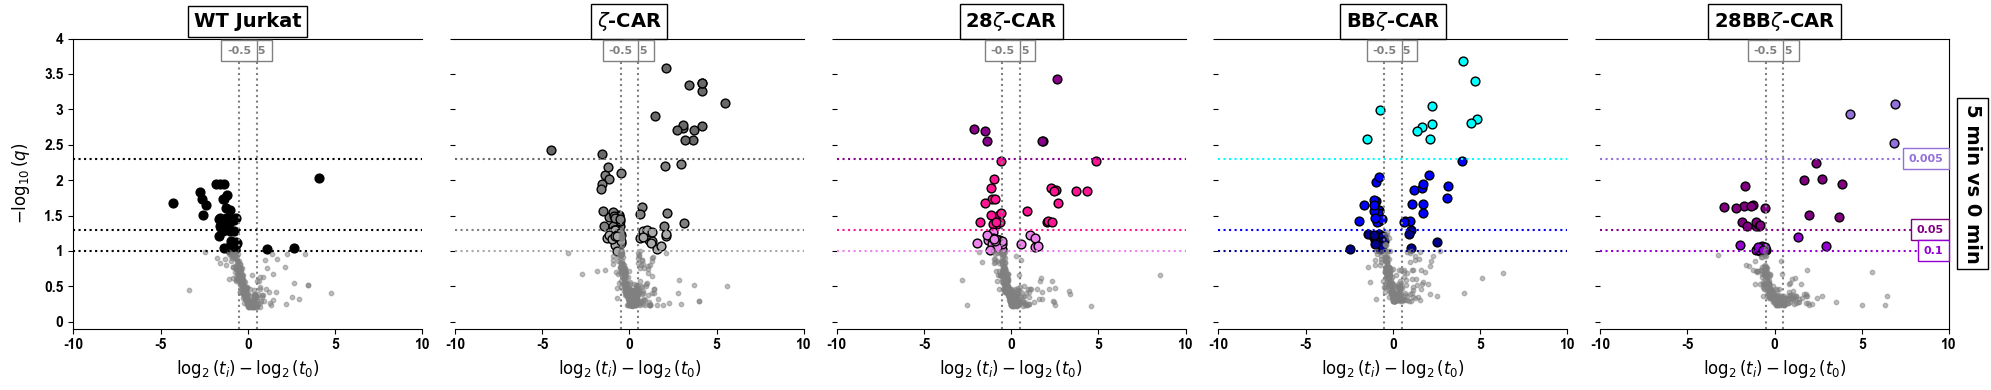

In [10]:
## Grab the excel files and manage the data, including flanking sequences
file_dfs = [read_and_filter(f, columns) for f in main_files[0]]
file_lists = [[list(row) for row in list(df.to_numpy())] for df in file_dfs]
file_lists = [ [fcond_cols] + dup_flanks_matrix(f[1:], [23,24,25]) for f in file_lists]
file_lists = [[row for row in f if row[23] == row[23]] for f in file_lists]
file_lists = [[row + [ptmsea_transform(row[19], row[17], "5m_vs_0m"),
                      ptmsea_transform(row[20], row[18], "15m_vs_0m")] for row in f]
             for f in file_lists]
file_lists = [[f[0]] + sorted(f[1:], key = lambda x: (x[23], x[26])) for f in file_lists]
gct_inds = [[f"{row[23]}-p" for row in f[1:]] for f in file_lists]
gct_vals = [[row[-2:] for row in f[1:]] for f in file_lists]
gct_heads = [f[0][-2:] for f in file_lists]
# Finally, write the GCT files for PTM-SEA later
for i in range(len(file_lists)):
    write_gct_file(gct_inds[i], gct_vals[i], gct_heads[i], gct_outnames[i])

# Becuase there's an uneven number of reps, this just fails and it's not worth it imo
narnar = [multi_reg_lineplot(file_dfs[i], 
                             groups = reg_gs, 
                             labels = ["0m", "5m", "15m"],
                             savefile = reg_outnames[i]) for i in range(len(file_dfs))]


# Perform PCA clustering using the file dataframes.
pca_ax = cluster_plotting(file_dfs, # list with minimum 1 df
                 ["thresholded timepoint1", "thresholded timepoint2", "thresholded timepoint3"],     
                 exp_names[0],
                 pca_outnames,
                 slices[i],
                 ["0 min", "5 min", "15 min"],
                 colours,
                 markers = ["o","^", "s"],
                 cluster = 'PCA',
                 markersize=100,
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                 pca_kwargs = dict(n_components = 2,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0))

pepdep_volcano_arr(file_dfs,
                   ["qvalues for SILAC timepoint1"],
                   ["SILAC ratio 21 timepoint1"],
                    wide = True,
                   left_labels = leftlabs,
                   right_labels = rightlabs,
                   bottom_labels = bottomlabs,
                   colours = [colours,colours],
                   top_labels = exp_names[0],
                   xlim = 10, ylim = 4,
                   fc_transform = "log2",
                   sig_transform = "log10",
                   fc_label_transform = "none",
                   sig_cutoffs = sigs,
                   fc_cutoff = 0.5,
                   save = volc_outnames[0])

#all_peps = [[Peptide(list(file_dfs[j].iloc[i][[col for col in list(file_dfs[j].columns) if "rep" in col]].astype(float)), 
#                   ["0m R1", "0m R2", "0m R3", "0m R4", "0m R5",
#                    "5m R1", "5m R2", "5m R3", "5m R4", "5m R5",
#                    "15m R1", "15m R2", "15m R3", "15m R4", "15m R5"],
#                    ["0m", "5m", "15m"],
#                    file_dfs[j].iloc[i]["assigned sequence"],
#                    statistics = list(file_dfs[j].iloc[i][[col for col in list(file_dfs[j].columns) if "qvalue" in col]].astype(float)),
#                    statistics_headers = ["5m vs 0m qvalue", "15m vs 0m qvalue"],
#                     foldchange = list(np.log2(file_dfs[j].iloc[i][[col for col in list(file_dfs[j].columns) if "ratio" in col]].astype(float))),
#                    foldchange_headers = ["5m vs 0m", "15m vs 0m"],
#                     sites = fr'$^{{{file_dfs[j].iloc[i]["phosphosite annotated"]}}}$',
#                     gene = str(file_dfs[j].iloc[i]["UNIPROT Gene Name"]),
#                     unique_id = str(file_dfs[j].iloc[i]["U_ID"]),
#                     colours = colours[j],
#                     markers = ["s", "o", "D"]) 
#            for i in range(len(file_dfs[j])) if str(file_dfs[j].iloc[i]["UNIPROT Gene Name"]) != str("nan")]
#            for j in range(len(file_dfs))]

#for path in site_outnames:
#    if not os.path.exists(path):
#        os.mkdir(path)
#i=0
#for peps in all_peps:
#    print(site_outnames[i])
#    make_all_pepplots(peps, path = site_outnames[i],
#                  subset = ["m"], exclude = ["30m"],
#                  comparisons = ["5m vs 0m qvalue",
#                                 "15m vs 0m qvalue"],
#                  foldchange_group = " 0m",
#                      global_max = 6,
#                      heatmap_kwargs = {'aspect': 'equal', 'remove_spines': False, 'subplot_args': {'figsize': (14, 1)}, 
#                                        'colorbar_args': {'orientation': 'vertical', 'location': 'right', 'shrink': 2}, 
#                                        'textdict': {'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold'}, 
#                                        'img_name': 'figs/pep_plots/tbc1d5/heatmaps/tbc1d5_2_foldchange_all', 
#                                        'heat_title': '', 
#                                        'clb_label': 'log$_{2}$(FC)',
#                                        'maxs': [-6, 6], 
#                                        "sig_bounds" : [0.1,0.05,0.005],
#                                        'cmap': mph.trans})
#    i+=1



In [11]:
gsf.imp_main("/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant",
             "qvalue",
             "/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/r_scripts/ssGSEA2.0.R",
             "/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/database/ptm.sig.db.all.flanking.human.v2.0.0.gmt")


Checking the input arguments for validity...
Finding all GCT files with name qvalue in directory /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant...
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/qvalue.gct...
Writing the file /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/run_ptmsea.R...
Using subprocess to call: Rscript /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/run_ptmsea.R


parsing as GCT v1.3
/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/qvalue.gct 437 rows, 2 cols, 0 row descriptors, 0 col descriptors
parsing as GCT v1.3
/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/qvalue_unique.gct 437 rows, 2 cols, 0 row descriptors, 0 col descriptors


main loop: 2.739601 
[1] "Total gene sets: 146"
[1] "Unique gene sets: 146"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-scores.gct 
Dimensions of matrix: [146x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [146x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [146x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-combined.gct 
Dimensions of matrix: [146x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATI

main loop: 2.528852 
[1] "Total gene sets: 144"
[1] "Unique gene sets: 144"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-scores.gct 
Dimensions of matrix: [144x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [144x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [144x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-combined.gct 
Dimensions of matrix: [144x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.69536 
[1] "Total gene sets: 122"
[1] "Unique gene sets: 122"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-scores.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-combined.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/j

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATI

main loop: 1.837196 
[1] "Total gene sets: 122"
[1] "Unique gene sets: 122"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-scores.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-combined.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.774732 
[1] "Total gene sets: 119"
[1] "Unique gene sets: 119"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-scores.gct 
Dimensions of matrix: [119x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [119x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [119x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-combined.gct 
Dimensions of matrix: [119x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATI

main loop: 1.780327 
[1] "Total gene sets: 115"
[1] "Unique gene sets: 115"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-scores.gct 
Dimensions of matrix: [115x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [115x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [115x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-combined.gct 
Dimensions of matrix: [115x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.668627 
[1] "Total gene sets: 116"
[1] "Unique gene sets: 116"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-scores.gct 
Dimensions of matrix: [116x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [116x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [116x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-combined.gct 
Dimensions of matrix: [116x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATI

main loop: 1.35731 
[1] "Total gene sets: 108"
[1] "Unique gene sets: 108"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-scores.gct 
Dimensions of matrix: [108x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [108x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [108x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-combined.gct 
Dimensions of matrix: [108x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/j

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 2.114109 
[1] "Total gene sets: 130"
[1] "Unique gene sets: 130"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-scores.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-combined.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/jupy

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATIN

main loop: 1.990405 
[1] "Total gene sets: 130"
[1] "Unique gene sets: 130"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-scores.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-combined.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
ssGSEA2.0 run is complete!! :)



Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

In [13]:
# Filter out all the nonsense from the PTM-SEA output, keep
# only the enrichment scores, q-values, and groups
mso.imp_main("/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant",
             "output-combined.gct",
             "\t",
             "output_combined_heatmap.txt")

Checking the input arguments for validity...
Finding all GCT files with name output-combined.gct in directory /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant...
Creating the filtered output file, used for heatmap creation...
File: /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-combined.gct
Headers found:
	id
	fdr.pvalue.5m_vs_0m
	fdr.pvalue.15m_vs_0m
	5m_vs_0m
	15m_vs_0m
Finding all values associated with headers.
Writing the output file to: /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output_combined_heatmap.txt...
Creating the filtered output file, used for heatmap creation...
File: /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-combined.gct
Headers found:
	id
	fdr.pvalue.5m_vs_0m
	fdr.pvalue.15m_vs_0m
	5m_vs_0m
	

In [17]:
# Make the bubbleplots :)
enrich_bubbleplot_list(ptm_files, outdirs,
                       sig_exception = ["ween"],
                                       #["./skbr3_28bbz/pY_data/output_combined_heatmap.txt",
                                       # "./skbr3_28bbz/pY_data/output_combined_heatmap.txt",],
                       significance = 0.2,
                       group_heads = ["5 min", "15 min"],
                       max_score = 6)

figs/je6_TCELL/sea/output_combined_heatmap.txt
figs/j132_TCELL/sea/output_combined_heatmap.txt
figs/j133_TCELL/sea/output_combined_heatmap.txt
figs/j134_TCELL/sea/output_combined_heatmap.txt
figs/j135_TCELL/sea/output_combined_heatmap.txt
figs/jot1_TCELL/sea/output_combined_heatmap.txt


FileNotFoundError: [Errno 2] No such file or directory: 'figs/jot1_TCELL/sea/output_combined_heatmap.txt'

[]
[198, 236, 214]
xlim = 10
title = 28BB$\zeta$-CAR
vagina (np.float64(-5.488590538896631), np.float64(9.658952284931404))
vagina [-6. -4. -2.  0.  2.  4.  6.  8. 10.]
penis (np.float64(-10.0), np.float64(10.0))
penis [-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10. ]
(np.float64(-10.0), np.float64(10.0))
[-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10. ]
show_siglabel = True
figs/je6_TCELL/sites
Checking the input arguments for validity...
Finding all GCT files with name qvalue in directory /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant...
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/qvalue_unique.gct...
Writing the file /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/run_ptmsea.R...
Using subprocess to call: Rscript /mnt/c/Users/redas/Desktop/ju

parsing as GCT v1.3
/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/qvalue_unique.gct 437 rows, 2 cols, 0 row descriptors, 0 col descriptors


main loop: 1.71053 
[1] "Total gene sets: 144"
[1] "Unique gene sets: 144"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-scores.gct 
Dimensions of matrix: [144x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [144x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [144x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-combined.gct 
Dimensions of matrix: [144x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/j

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.194432 
[1] "Total gene sets: 122"
[1] "Unique gene sets: 122"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-scores.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-combined.gct 
Dimensions of matrix: [122x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.16387 
[1] "Total gene sets: 115"
[1] "Unique gene sets: 115"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-scores.gct 
Dimensions of matrix: [115x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [115x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [115x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j134_TCELL/sea/output-combined.gct 
Dimensions of matrix: [115x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/j

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.078436 
[1] "Total gene sets: 108"
[1] "Unique gene sets: 108"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-scores.gct 
Dimensions of matrix: [108x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [108x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [108x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j135_TCELL/sea/output-combined.gct 
Dimensions of matrix: [108x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.421162 
[1] "Total gene sets: 130"
[1] "Unique gene sets: 130"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-scores.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/je6_TCELL/sea/output-combined.gct 
Dimensions of matrix: [130x2]
Setting precision to 4
Saved.
Creating run_ptmsea.R for the input file /mnt/c/Users/redas/Desktop/jupy

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATING_PEPTIDE
PERT-PSP_PAR1_ACTIVATING_PEPTIDE
PERT-PSP_ONCOSTATIN_M
PERT-PSP_OKADAIC_ACID
PERT-PSP_NOCODAZOLE
PERT-PSP_NGF
PERT-PSP_METFORMIN
PERT-PSP_LPA
PERT-PSP_LAPATINIB
PERT-PSP_ISOPROTERENOL
PERT-PSP_IONOMYCIN
PERT-PSP_IONIZING_RADIATION
PERT-PSP_INSULIN
PERT-PSP_IL_2
PERT-PSP_IL_1B
PERT-PSP_IL_1A
PERT-PSP_I

main loop: 1.215313 
[1] "Total gene sets: 126"
[1] "Unique gene sets: 126"
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/jot1_TCELL/sea/output-scores.gct 
Dimensions of matrix: [126x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/jot1_TCELL/sea/output-pvalues.gct 
Dimensions of matrix: [126x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/jot1_TCELL/sea/output-fdr-pvalues.gct 
Dimensions of matrix: [126x2]
Setting precision to 4
Saved.
Saving file to  /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/jot1_TCELL/sea/output-combined.gct 
Dimensions of matrix: [126x2]
Setting precision to 4
Saved.
ssGSEA2.0 run is complete!! :)

Checking the input arguments for val

Warning messages:
1: In parse.gctx(input.ds) :
  parse.gctx has been deprecated. Please use parse_gctx.
2: In ssGSEA2("/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/jot1_TCELL/sea/qvalue.gct",  :
  rids not unique! Making ids unique and exporting new GCT file...


3: In parse.gctx(fname = gct.unique) :
  parse.gctx has been deprecated. Please use parse_gctx.
4: In Read.GeneSets.db2(gsdb, thres.min = min.overlap, thres.max = 2000) :
  

Duplicated gene set members detected. Removing redundant members from:

PERT-PSP_Y27632
PERT-PSP_VIRUS_INFECTION
PERT-PSP_VANADATE
PERT-PSP_UV
PERT-PSP_U0126
PERT-PSP_TPO
PERT-PSP_TNF
PERT-PSP_THROMBIN
PERT-PSP_THC
PERT-PSP_THAPSIGARGIN
PERT-PSP_TGF_ALPHA
PERT-PSP_SPHINGOSINE_1_PHOSPHATE
PERT-PSP_SII_ANGIOTENSIN_2
PERT-PSP_SCF
PERT-PSP_RGD
PERT-PSP_RESVERATROL
PERT-PSP_RAPAMYCIN
PERT-PSP_PRL
PERT-PSP_PHORBOL_ESTER_IONOMYCIN
PERT-PSP_PHORBOL_ESTER
PERT-PSP_PDGF
PERT-PSP_PD98059
PERT-PSP_PAR2_ACTIVATI

Creating the filtered output file, used for heatmap creation...
File: /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output-combined.gct
Headers found:
	id
	fdr.pvalue.5m_vs_0m
	fdr.pvalue.15m_vs_0m
	5m_vs_0m
	15m_vs_0m
Finding all values associated with headers.
Writing the output file to: /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j132_TCELL/sea/output_combined_heatmap.txt...
Creating the filtered output file, used for heatmap creation...
File: /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output-combined.gct
Headers found:
	id
	fdr.pvalue.5m_vs_0m
	fdr.pvalue.15m_vs_0m
	5m_vs_0m
	15m_vs_0m
Finding all values associated with headers.
Writing the output file to: /mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/figs/j133_TCELL/sea/output_comb

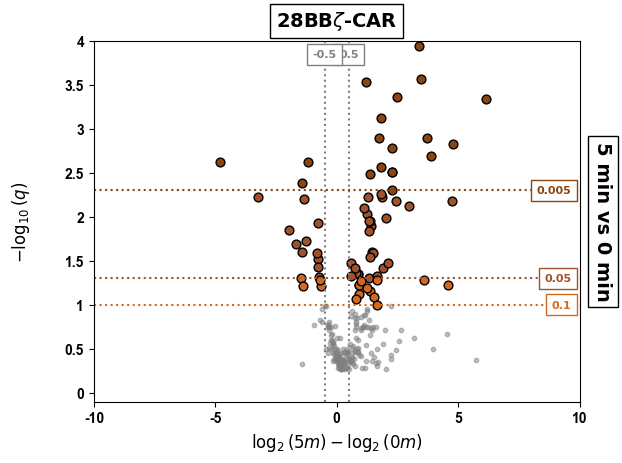

In [26]:
# Do the JOT1 stuff meow
## Grab the excel files and manage the data, including flanking sequences
file_dfs = [read_and_filter(f, columns) for f in supp_files[0]]
file_lists = [[list(row) for row in list(df.to_numpy())] for df in file_dfs]
file_lists = [ [fcond_cols] + dup_flanks_matrix(f[1:], [23,24,25]) for f in file_lists]
file_lists = [[row for row in f if row[23] == row[23]] for f in file_lists]
file_lists = [[row + [ptmsea_transform(row[19], row[17], "5m_vs_0m"),
                      ptmsea_transform(row[20], row[18], "15m_vs_0m")] for row in f]
             for f in file_lists]
file_lists = [[f[0]] + sorted(f[1:], key = lambda x: (x[23], x[26])) for f in file_lists]
gct_inds = [[f"{row[23]}-p" for row in f[1:]] for f in file_lists]
gct_vals = [[row[-2:] for row in f[1:]] for f in file_lists]
gct_heads = [f[0][-2:] for f in file_lists]
# Finally, write the GCT files for PTM-SEA later
for i in range(len(file_lists)):
    write_gct_file(gct_inds[i], gct_vals[i], gct_heads[i], gct_outnames[-1])

# Becuase there's an uneven number of reps, this just fails and it's not worth it imo
narnar = [multi_reg_lineplot(file_dfs[i], 
                             groups = reg_gs, 
                             labels = ["0m", "5m", "15m"],
                             savefile = reg_outnames[-1]) for i in range(len(file_dfs))]


# Perform PCA clustering using the file dataframes.
pca_ax = cluster_plotting(file_dfs, # list with minimum 1 df
                 ["thresholded timepoint1", "thresholded timepoint2", "thresholded timepoint3"],     
                 exp_names[0],
                 [pca_outnames[-1]],
                 slices[i],
                 ["0 min", "5 min", "15 min"],
                 [mph.handle_colours("browns", 3)],
                 markers = ["o","^", "s"],
                 cluster = 'PCA',
                 markersize=100,
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                 pca_kwargs = dict(n_components = 2,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0))

qs = list(file_dfs[0]["qvalues for SILAC timepoint1"].to_numpy())
fc = list(file_dfs[0]["SILAC ratio 21 timepoint1"].to_numpy())

mph.volcano(qs, fc, 
           ylabel = leftlabs[0],
            ylabel_right = rightlabs[0],
            title = exp_names[0][-1],
            xlabel = bottomlabs[0],
                   colours = mph.handle_colours("browns", 3),
                   xlim = 10, ylim = 4,
                   fc_transform = "log2",
                   sig_transform = "log10",
                   fc_label_transform = "none",
                   sig_cutoffs = sigs,
                   fc_cutoff = 0.5,
                   save = volc_outnames[1])


all_peps = [[Peptide(list(file_dfs[j].iloc[i][[col for col in list(file_dfs[j].columns) if "rep" in col]].astype(float)), 
                   ["0m R1", "0m R2", "0m R3", "0m R4", "0m R5",
                    "5m R1", "5m R2", "5m R3", "5m R4", "5m R5",
                    "15m R1", "15m R2", "15m R3", "15m R4", "15m R5"],
                    ["0m", "5m", "15m"],
                    file_dfs[j].iloc[i]["assigned sequence"],
                    statistics = list(file_dfs[j].iloc[i][[col for col in list(file_dfs[j].columns) if "qvalue" in col]].astype(float)),
                    statistics_headers = ["5m vs 0m qvalue", "15m vs 0m qvalue"],
                     foldchange = list(np.log2(file_dfs[j].iloc[i][[col for col in list(file_dfs[j].columns) if "ratio" in col]].astype(float))),
                    foldchange_headers = ["5m vs 0m", "15m vs 0m"],
                     sites = fr'$^{{{file_dfs[j].iloc[i]["phosphosite annotated"]}}}$',
                     gene = str(file_dfs[j].iloc[i]["UNIPROT Gene Name"]),
                     unique_id = str(file_dfs[j].iloc[i]["U_ID"]),
                     colours = colours[j],
                     markers = ["s", "o", "D"]) 
            for i in range(len(file_dfs[j])) if str(file_dfs[j].iloc[i]["UNIPROT Gene Name"]) != str("nan")]
            for j in range(len(file_dfs))]

for path in [site_outnames[-1]]:
    if not os.path.exists(path):
        os.mkdir(path)
i=0
for peps in all_peps:
    print(site_outnames[i])
    make_all_pepplots(peps, path = site_outnames[-1],
                  subset = ["m"], exclude = ["30m"],
                  comparisons = ["5m vs 0m qvalue",
                                 "15m vs 0m qvalue"],
                  foldchange_group = " 0m",
                      global_max = 6,
                      heatmap_kwargs = {'aspect': 'equal', 'remove_spines': False, 'subplot_args': {'figsize': (14, 1)}, 
                                        'colorbar_args': {'orientation': 'vertical', 'location': 'right', 'shrink': 2}, 
                                        'textdict': {'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold'}, 
                                        'img_name': 'figs/pep_plots/tbc1d5/heatmaps/tbc1d5_2_foldchange_all', 
                                        'heat_title': '', 
                                        'clb_label': 'log$_{2}$(FC)',
                                        'maxs': [-6, 6], 
                                        "sig_bounds" : [0.1,0.05,0.005],
                                        'cmap': mph.trans})
    i+=1

gsf.imp_main("/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant",
             "qvalue",
             "/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/r_scripts/ssGSEA2.0.R",
             "/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant/database/ptm.sig.db.all.flanking.human.v2.0.0.gmt")

# Filter out all the nonsense from the PTM-SEA output, keep
# only the enrichment scores, q-values, and groups
mso.imp_main("/mnt/c/Users/redas/Desktop/jupyter_directory/salomon_lab_folder/car_generations/proteomics_quant",
             "output-combined.gct",
             "\t",
             "output_combined_heatmap.txt")

# Make the bubbleplots :)
enrich_bubbleplot_list([ptm_files[-1]], [outdirs[-1]],
                       sig_exception = ["ween"],
                                       #["./skbr3_28bbz/pY_data/output_combined_heatmap.txt",
                                       # "./skbr3_28bbz/pY_data/output_combined_heatmap.txt",],
                       significance = 0.2,
                       group_heads = ["5 min", "15 min"],
                       max_score = 6)

In [18]:
help(mph.volcano)

Help on function volcano in module helpers.mph_modules.volcano_erupt:

volcano(sig_list, foldchanges, fc_transform='none', sig_transform='log10', sig_comp='<', fc_cutoff=1, sig_cutoffs=[0.05, 0.1, 0.15], colours=['hotpink', 'dodgerblue', 'mediumpurple'], axes=None, title=None, ylabel=None, xlabel=None, xlim=None, ylabel_right=None, ylim=None, fc_label_transform='log2', sig_label_transform='log10', siglabel_side='right', show_siglabel=True, show_fclabel=True, fontdict={'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold'}, save=None, x_axis_turnoff=False, y_axis_turnoff=False, show_spines={'top': True, 'bottom': True, 'left': True, 'right': True})

